# ENV717 L5- MARKET CLEARING

#### 

In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the data

In [87]:
#Read data
df_genData=pd.read_excel(io="L5MarketClearingData.xlsx",sheet_name="GeneratorsData",skiprows=1) #read data from generators tab and skip the first row
df_demandData=pd.read_excel(io="L5MarketClearingData.xlsx",sheet_name="DemandData",skiprows=1) #read data from demand tab and skip the first row

In [88]:
#define the size of the sets
NumGens=len(df_genData)
NumDemands=len(df_demandData)
print("We read data for", NumGens, "generators/sellers")
print("We read data for", NumDemands, "demands/buyers")

We read data for 4 generators/sellers
We read data for 3 demands/buyers


In [89]:
df_genData.head(NumGens)

,Company,Quantity(MW),Price($/MWh)
0,A,100,50
1,B,500,28
2,C,200,30
3,D,150,53


### 1. Stack the generators by merit order - from least cost to highest

In [90]:
SupplySorted=df_genData.sort_values("Price($/MWh)")
SupplySorted.head(NumGens)

,Company,Quantity(MW),Price($/MWh)
1,B,500,28
2,C,200,30
0,A,100,50
3,D,150,53


### 2. Create supply curve

In [91]:
# Create a column with the cummulative capacity [MW] bid at that PRICE or less and initialize in zero
SupplySorted["CUMCAP(MW)"]=0

In [92]:
SupplySorted.head(NumGens)

,Company,Quantity(MW),Price($/MWh),CUMCAP(MW)
1,B,500,28,0
2,C,200,30,0
0,A,100,50,0
3,D,150,53,0


In [93]:
# Fill the CUMCAP column. The first row is just the QUANTITY of that plant (in that row)
SupplySorted.iloc[0,3]=SupplySorted.iloc[0,1]
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,NumGens):  
                SupplySorted.iloc[i,3]=SupplySorted.iloc[i-1,3]+SupplySorted.iloc[i,1]
SupplySorted.head(NumGens)

,Company,Quantity(MW),Price($/MWh),CUMCAP(MW)
1,B,500,28,500
2,C,200,30,700
0,A,100,50,800
3,D,150,53,950


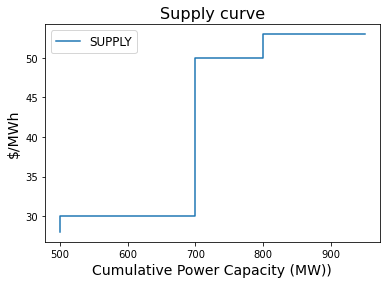

In [94]:
plt.step(SupplySorted["CUMCAP(MW)"],SupplySorted["Price($/MWh)"],label="SUPPLY")
plt.title("Supply curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [95]:
## Add o first row that shows that any quantity below 500 can be purchased at the least cost
new_row = pd.DataFrame({'Company':'', 'Quantity(MW)':0, 'Price($/MWh)':28, 'CUMCAP(MW)':0}, index=[0])
SupplySorted = pd.concat([new_row,SupplySorted[:]]).reset_index(drop=True)
print (SupplySorted)

  Company  Quantity(MW)  Price($/MWh)  CUMCAP(MW)
0                     0            28           0
1       B           500            28         500
2       C           200            30         700
3       A           100            50         800
4       D           150            53         950


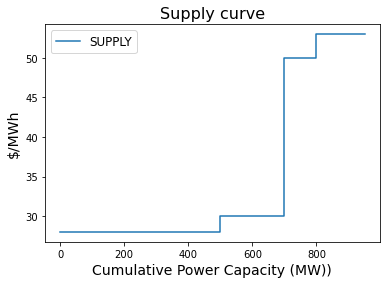

In [96]:
plt.step(SupplySorted["CUMCAP(MW)"],SupplySorted["Price($/MWh)"],label="SUPPLY")
plt.title("Supply curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

### 3. Stack demands from highest offer to lowest

In [45]:
DemandSorted=df_demandData.sort_values("Price($/MWh)",ascending=False) #use ascending parameter to sort from high to low
DemandSorted.head(NumDemands)

,Company,Quantity (MW),Price($/MWh)
2,G,100,50
0,E,500,40
1,F,300,29


### 4. Create demand curve

In [46]:
# Create a column with the cummulative capacity [MW] offered to be puchased at that PRICE or less and initialize in zero
DemandSorted["CUMCAP(MW)"]=0

In [47]:
DemandSorted.head(NumDemands)

,Company,Quantity (MW),Price($/MWh),CUMCAP(MW)
2,G,100,50,0
0,E,500,40,0
1,F,300,29,0


In [48]:
# Fill the CUMCAP column. The first row is just the QUANTITY of that demand (in that row)
DemandSorted.iloc[0,3]=DemandSorted.iloc[0,1]
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,NumDemands):  
                DemandSorted.iloc[i,3]=DemandSorted.iloc[i-1,3]+DemandSorted.iloc[i,1]
DemandSorted.head(NumDemands)

,Company,Quantity (MW),Price($/MWh),CUMCAP(MW)
2,G,100,50,100
0,E,500,40,600
1,F,300,29,900


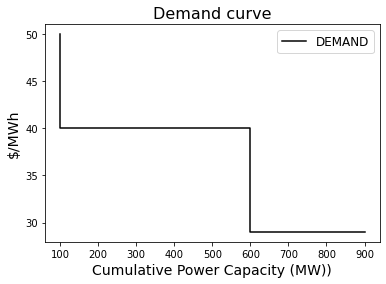

In [97]:
plt.step(DemandSorted["CUMCAP(MW)"],DemandSorted["Price($/MWh)"],label="DEMAND",color="black")
plt.title("Demand curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [98]:
## Add o first row that shows that any quantity below 100 can be purchased at the highest offered price
new_row = pd.DataFrame({'Company':'', 'Quantity(MW)':0, 'Price($/MWh)':28, 'CUMCAP(MW)':0}, index=[0])
DemandSorted = pd.concat([new_row,DemandSorted[:]]).reset_index(drop=True)
print (DemandSorted)

  Company  Quantity(MW)  Price($/MWh)  CUMCAP(MW)  Quantity (MW)
0                   0.0            28           0            NaN
1       G           NaN            50         100          100.0
2       E           NaN            40         600          500.0
3       F           NaN            29         900          300.0


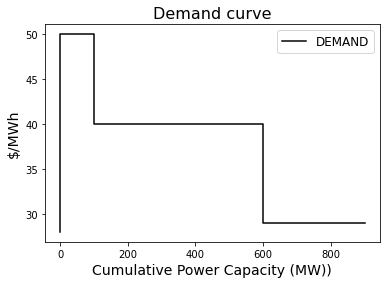

In [99]:
plt.step(DemandSorted["CUMCAP(MW)"],DemandSorted["Price($/MWh)"],label="DEMAND",color="black")
plt.title("Demand curve",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()

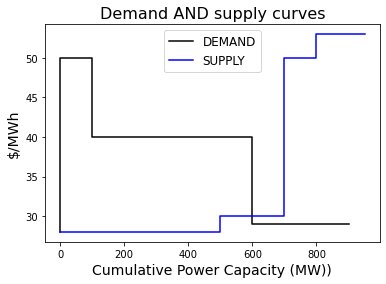

In [101]:
plt.step(DemandSorted["CUMCAP(MW)"],DemandSorted["Price($/MWh)"],label="DEMAND",color="black")
plt.step(SupplySorted["CUMCAP(MW)"],SupplySorted["Price($/MWh)"],label="SUPPLY",color="blue")
plt.title("Demand AND supply curves",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()